# <center><b> `HCHO Gas Forcasting model - ARIMA`</b></center>

### `Importing libraries`


In [1]:
import pandas as pd


### `Load the datasets`

In [2]:
df_col_mat_nuw = pd.read_csv('Data Sets\col_mat_nuw_output.csv')
df_kan = pd.read_csv('Data Sets\kan_output.csv')
df_mon_kur_jaf = pd.read_csv('Data Sets\mon_kur_jaf_output.csv')

In [3]:
# Adding Column names
columns = ['HCHO Value','Location','Date','Next Date']
df_col_mat_nuw.columns = columns
df_kan.columns = columns
df_mon_kur_jaf.columns = columns

In [4]:
print(df_col_mat_nuw.head())
print(df_kan.head())
print(df_mon_kur_jaf.head())

   HCHO Value        Location        Date   Next Date
0    0.000263  Colombo Proper  2019-01-02  2019-01-03
1    0.000099  Colombo Proper  2019-01-03  2019-01-04
2    0.000210  Colombo Proper  2019-01-04  2019-01-05
3    0.000179  Colombo Proper  2019-01-05  2019-01-06
4    0.000108  Colombo Proper  2019-01-06  2019-01-07
   HCHO Value      Location        Date   Next Date
0    0.000092  Kandy Proper  2019-01-02  2019-01-03
1         NaN  Kandy Proper  2019-01-03  2019-01-04
2    0.000191  Kandy Proper  2019-01-04  2019-01-05
3    0.000122  Kandy Proper  2019-01-05  2019-01-06
4   -0.000065  Kandy Proper  2019-01-06  2019-01-07
   HCHO Value            Location        Date   Next Date
0    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
1    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
2    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
3   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06
4    0.000146  Bibile, Monaragala  2019-01-06  2019-01-07


In [5]:
#check the location values
print(df_col_mat_nuw['Location'].unique())
print(df_kan['Location'].unique())
print(df_mon_kur_jaf['Location'].unique())


['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']
['Kandy Proper']
['Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


In [6]:
# check the data count for each location

location_counts = {
    'Colombo Proper': 0,
    'Deniyaya, Matara': 0,
    'Nuwara Eliya Proper': 0,
    'Kandy Proper': 0,
    'Bibile, Monaragala': 0,
    'Kurunegala Proper': 0,
    'Jaffna Proper': 0
}

for location in df_col_mat_nuw['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_kan['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_mon_kur_jaf['Location']:
    if location in location_counts:
        location_counts[location] += 1

for i in location_counts:
    print(i, location_counts[i])

Colombo Proper 1825
Deniyaya, Matara 1826
Nuwara Eliya Proper 1826
Kandy Proper 1825
Bibile, Monaragala 1825
Kurunegala Proper 1826
Jaffna Proper 1826


In [7]:
# Create separate dataframes for each location
colombo_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Colombo Proper']
Deniyaya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Deniyaya, Matara']
Nuwara_Eliya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Nuwara Eliya Proper']
Kandy_df = df_kan[df_kan['Location'] == 'Kandy Proper']
Bibile_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Bibile, Monaragala']
Kurunegala_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Kurunegala Proper']
Jaffna_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Jaffna Proper']

In [8]:
# check for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())

Colombo
 HCHO Value    487
Location        0
Date            0
Next Date       0
dtype: int64
Deniyaya
 HCHO Value    847
Location        0
Date            0
Next Date       0
dtype: int64
Nuwaraeliya
 HCHO Value    1085
Location         0
Date             0
Next Date        0
dtype: int64
Kandy
 HCHO Value    793
Location        0
Date            0
Next Date       0
dtype: int64
Bibile
 HCHO Value    694
Location        0
Date            0
Next Date       0
dtype: int64
Kurunegala
 HCHO Value    592
Location        0
Date            0
Next Date       0
dtype: int64
Jaffna
 HCHO Value    365
Location        0
Date            0
Next Date       0
dtype: int64


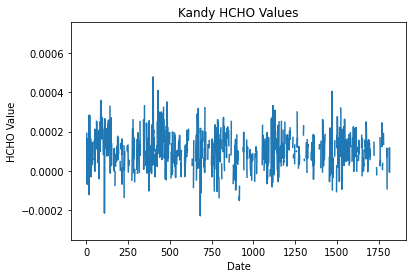

In [9]:
#plot the kandy HCHO values
import matplotlib.pyplot as plt
plt.plot(Kandy_df['HCHO Value'])
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.title('Kandy HCHO Values')
plt.show()


In [10]:
Kandy_df.head()

,HCHO Value,Location,Date,Next Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [11]:
Kandy_df['copy HCHO values'] = Kandy_df['HCHO Value']


In [12]:
Kandy_df.dtypes


HCHO Value          float64
Location             object
Date                 object
Next Date            object
copy HCHO values    float64
dtype: object

In [13]:
#droping Location, Next Date columns    
Kandy_df = Kandy_df.drop(['Location','Next Date'], axis=1)

In [14]:
Kandy_df.head()

,HCHO Value,Date,copy HCHO values
0,0.000092,2019-01-02,0.000092
1,NaN,2019-01-03,NaN
2,0.000191,2019-01-04,0.000191
3,0.000122,2019-01-05,0.000122
4,-0.000065,2019-01-06,-0.000065


In [15]:
Kandy_df.dtypes

HCHO Value          float64
Date                 object
copy HCHO values    float64
dtype: object

In [16]:
# Using interpolation to fill the missing values
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].interpolate(method='linear')

In [17]:
#check for null values
print('Kandy\n',Kandy_df.isnull().sum())

Kandy
 HCHO Value          793
Date                  0
copy HCHO values      0
dtype: int64


## `Stationary Test`

In [24]:
# importing adfuller
from statsmodels.tsa.stattools import adfuller

def adfuller_test(HCHO):
    result=adfuller(HCHO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        


In [25]:
#checking the stationarity of the data
adfuller_test(Kandy_df['copy HCHO values'])

ADF Test Statistic : -8.392519109074408
p-value : 2.3458028638032573e-13
#Lags Used : 16
Number of Observations Used : 1808
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## `Diffrencing`

Since the data set is not stationary have to difffrence to make it statinary

<AxesSubplot:>

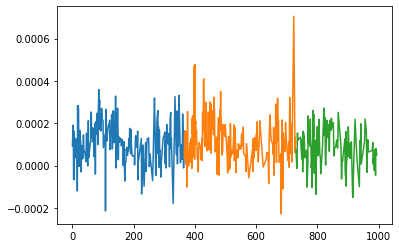

In [26]:
Kandy_df['copy HCHO values'][:365].plot()
Kandy_df['copy HCHO values'][365:730].plot()
Kandy_df['copy HCHO values'][730:995].plot()


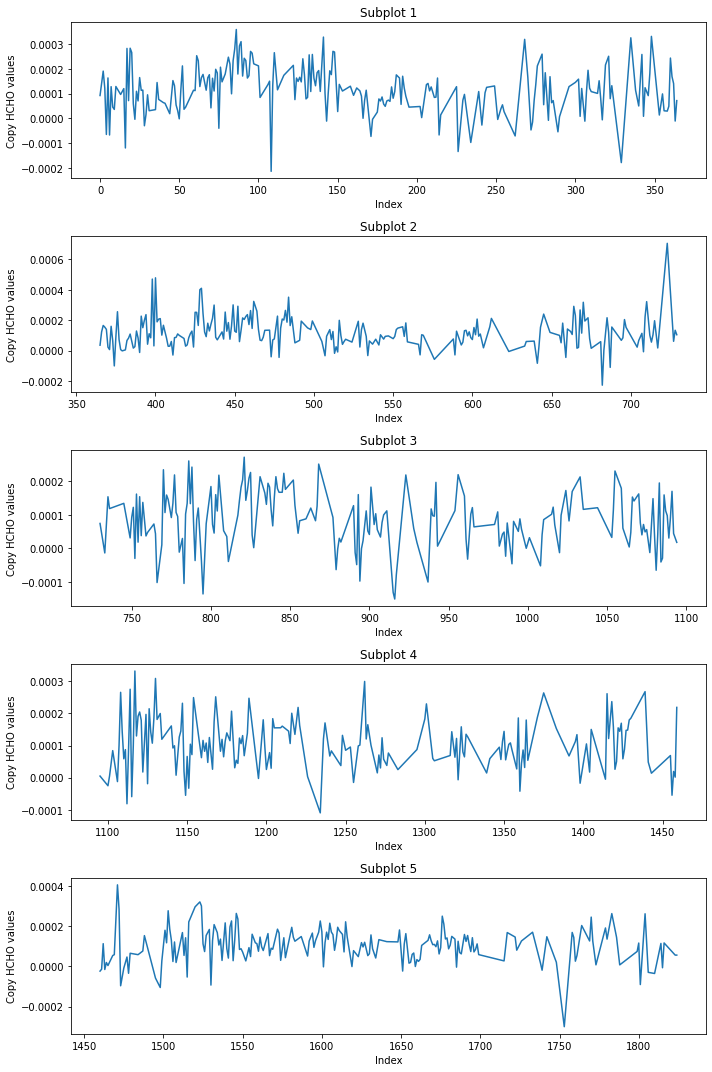

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(Kandy_df) // 365, ncols=1, figsize=(10, 15))

for i, ax in enumerate(axes):
    start_index = i * 365
    end_index = (i + 1) * 365
    data = Kandy_df['copy HCHO values'].iloc[start_index:end_index]
    ax.plot(data)
    ax.set_title(f"Subplot {i+1}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Copy HCHO values")

plt.tight_layout()
plt.show()


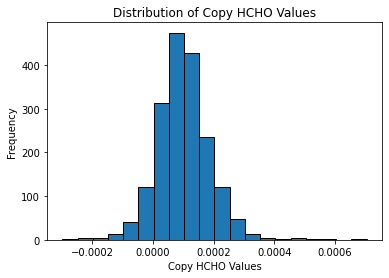

In [28]:
import matplotlib.pyplot as plt

# Assuming your copy HCHO values are stored in a variable called 'copy_hcho_values'
copy_hcho_values = Kandy_df['copy HCHO values']

# Plotting the distribution
plt.hist(copy_hcho_values, bins=20, edgecolor='black')
plt.xlabel('Copy HCHO Values')
plt.ylabel('Frequency')
plt.title('Distribution of Copy HCHO Values')
plt.show()
